In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
log_folder='logs'
topology="D"

# Preciso do CB-E Ajustado
# Preciso do DP=I Ajustado

#10 - CB-E Ajsutado = Com Redução

algoritimos = {
    1: "Concurrent",
    2: "FCFS-E",
    3: "DP-E",    
    4: "FCFS-I",
    5: "DP-I",
    7: "CB-E",
    8: "DP-I - Ajustado1", #ModulePlacementEdgewardsIndividually2
    9: "CB-E Ajustado", #ModulePlacementEdgewardsCommunicationAnalysis2
    10: "Novo V1",
    11: "Novo V2",
    12: "Novo V3",
}

applications = [
    'VRGame1',
    'DCNS'
]

#expertiments_anlysis=[1,2,3,4,5,7,8,9,10,11,12]
# expertiments_anlysis=[5,7,10,9]
expertiments_anlysis=[5,7,11]
expertiments_anlysis=[5,12]
cores={
    1:'blue',2:'brown',3:'orange',4:'red',5:'purple',7:'green',8:'blue',9:'blue', 10: 'black',11:'red',12:'orange'}

mobile_users = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#mobile_users = [8,9,10,11,12,13,14,15,16,17,18,19,20]
#mobile_users = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
simulation_time=2999.0

apps = [1,2]

estilos = {}
for key in cores:
    estilos[algoritimos[key]] = cores[key]

estilos

log_folder='logs/'+topology
pdfs=f'charts/{topology}_'

<ipython-input-32-975fb8038682>:54: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',


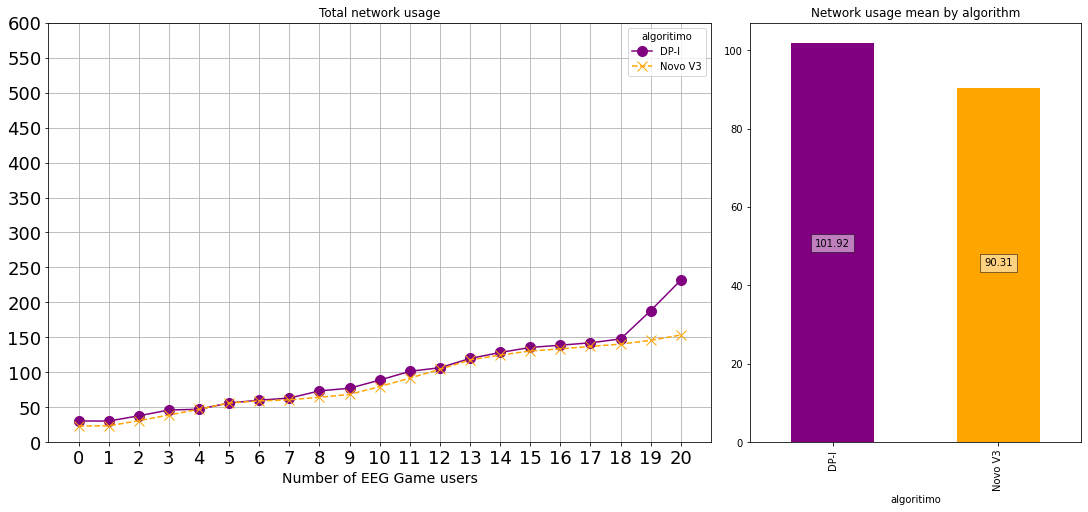

In [32]:
df_network = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    for mobile_user in mobile_users:
        df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_user}_network.csv')
        df['algoritimo'] = algoritimos[experiment_number]
        df['n_user'] = mobile_user
        if df_network.empty:
            df_network = df
        else:
            df_network = pd.concat([df_network,df])        
            
df_network['CurrentNetwork'] = df_network['CurrentNetwork']/1024

#total_network = df_network.groupby(['n_user','algoritimo']).max()

#fig = plt.figure(figsize=(5,15))
#fig, axs = plt.subplots(1,2, figsize=(5,15))
fig = plt.figure(constrained_layout=True, figsize=(4,15))
gs = fig.add_gridspec(nrows=1, ncols=3)
ax0 = fig.add_subplot(gs[0:2])
ax1 = fig.add_subplot(gs[2])

df_network \
    .pivot_table(values='CurrentNetwork',
                       index=['n_user'],
                       columns=['algoritimo'],
                       aggfunc='last'
                      )\
    .plot(title='Total network usage',
          ax=ax0,
          fontsize=18,         
          markersize=10,
          figsize=(15,7),
          color=estilos,
          style=["o-","x--","^-","d:",'s--'],
         )
ax0.set_xlabel("Number of EEG Game users", fontsize=14)
ax0.set_xticks(mobile_users)
ax0.set_yticks(range(0,650,50))
ax0.grid()


df_temp = df_network.groupby('algoritimo')['CurrentNetwork'].mean()

cores_t= [estilos[algo] for algo in df_temp.index]
#print(cores_t)

df_temp.plot.bar(ax=ax1, color=cores_t, title="Network usage mean by algorithm")


def addlabels(ax, x,y):
    for i in range(len(x)):
        ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',
               Bbox = dict(facecolor = 'white', alpha = .5))
        
addlabels(ax1,df_temp.index,df_temp.values)    


plt.savefig(pdfs+'netowrk.pdf')

Index(['DP-I', 'Novo V3'], dtype='object', name='algoritimo')
['purple', 'orange']
Index(['DP-I', 'Novo V3'], dtype='object', name='algoritimo')
['purple', 'orange']


<ipython-input-33-d6824a5b99d8>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',
<ipython-input-33-d6824a5b99d8>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',


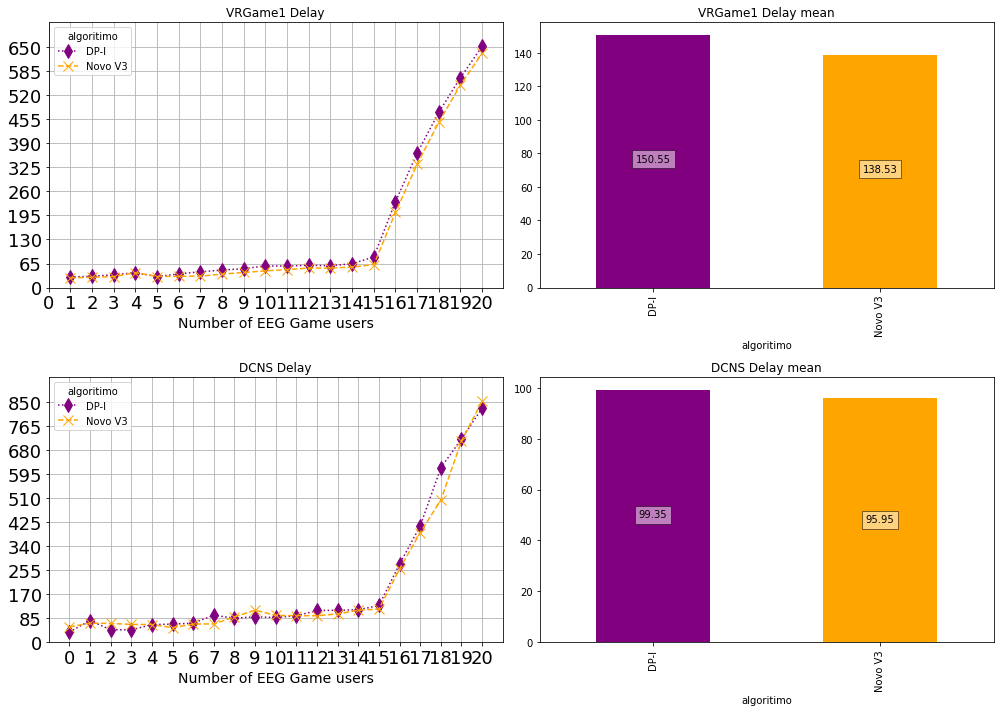

In [33]:
df_delay = pd.DataFrame()
def addlabels(ax, x,y):
    for i in range(len(x)):
        ax.text(i, y[i]//2, f'{y[i]:.2f}', ha = 'center',
               Bbox = dict(facecolor = 'white', alpha = .5))
        
for experiment_number in expertiments_anlysis:
    for mobile_user in mobile_users:
        df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_user}_loopsDelays.csv')
        df['algoritimo'] = algoritimos[experiment_number]
        df['n_user'] = mobile_user
        if df_delay.empty:
            df_delay = df
        else:
            df_delay = pd.concat([df_delay,df])
        
        
df_delay["app"] =0
df_delay["app"] = np.where(df_delay["Application"].str.startswith("VRGame1"),"VR_GAME",df_delay["app"])
df_delay["app"] = np.where(df_delay["Application"].str.startswith("DCNS"),"DCNS",df_delay["app"])
df_delay["app"] = np.where(df_delay["Application"].str.startswith("LSWM"),"SWM",df_delay["app"])

df_delay2 = df_delay[
    (df_delay['Time']==simulation_time) 
    & (df_delay['Application'].isin(applications))    
]

fig, axs = plt.subplots(len(applications),2, figsize=(14,10))


for key, application in enumerate(applications):
    if df_delay2[df_delay2['Application']==application].empty > 0:
        continue
        
    df_delay_pivot = df_delay2[df_delay2['Application']==application].pivot_table(values=['Delay'],
                      index=['n_user'],
                      columns=['algoritimo'],
                      aggfunc=np.sum
                     )
    df_delay_pivot.columns = df_delay_pivot.columns.get_level_values(1)
    
    
    ylim = df_delay_pivot.max().max().astype(np.int64)

    
    df_delay_pivot.plot(title=f'{application} Delay',
                            ax=axs[key,0],
                            fontsize=18,
                            markersize=10,
                            color=estilos,
                            style=["d:","x--","x-","d:",'x--'],
                            ylim=ylim
                     )
    axs[key,0].set_xlabel("Number of EEG Game users", fontsize=14)
    axs[key,0].set_xticks(mobile_users)
    axs[key,0].set_yticks(range(0,ylim, int(ylim/10)))
    axs[key,0].set_ylim(0, int(ylim*1.1))
    axs[key,0].grid()
    
    def_delay_mean = df_delay[(df_delay['Time']==simulation_time) & 
                              (df_delay['Application']==application)].groupby('algoritimo')['Delay'].mean()
    
    
    cores_t = [estilos[algo] for algo in estilos if algo in def_delay_mean.index]
    print(def_delay_mean.index)
    print(cores_t)
    
    cores_t= [estilos[algo] for algo in def_delay_mean.index]
    
    def_delay_mean.plot.bar(ax=axs[key,1],color=cores_t, title=f'{application} Delay mean')    
    
    addlabels(axs[key,1],def_delay_mean.index,def_delay_mean.values)    
    
plt.tight_layout()    
plt.savefig(pdfs+'delay.pdf')

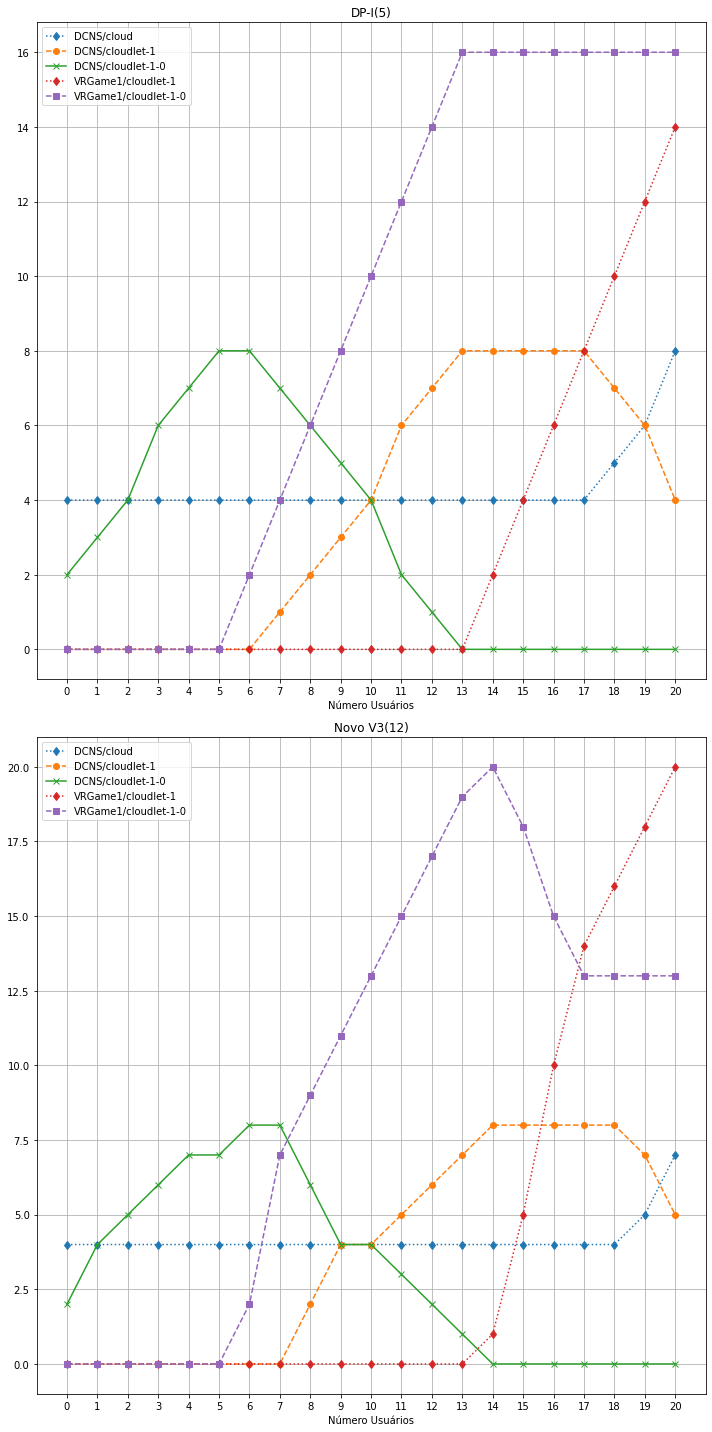

In [34]:
df_processos_dispositivo = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    for mobile_user in mobile_users:
        df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_user}_processoXDispostivo.csv')
        df['algoritimo'] = algoritimos[experiment_number]
        df['n_user'] = mobile_user
        if df_processos_dispositivo.empty:
            df_processos_dispositivo = df
        else:
            df_processos_dispositivo = pd.concat([df_processos_dispositivo,df])
        
        
df_processos_dispositivo["label"] = df_processos_dispositivo["Application"] +"/"+df_processos_dispositivo["Dispostivo"]
df_processos_dispositivo["label2"] = df_processos_dispositivo["Dispostivo"] + "/" +df_processos_dispositivo["Module"]

df_processos_dispositivo2 = df_processos_dispositivo[
    (df_processos_dispositivo['Time']==simulation_time) &
       (
        (df_processos_dispositivo['Application']=='VRGame1')  |
        (df_processos_dispositivo['Application']=='DCNS')  |
        (df_processos_dispositivo['Application']=='LSWM')  
    ) &
    (
        (df_processos_dispositivo['Dispostivo']=='cloud') 
        | (df_processos_dispositivo['Dispostivo']=='cloudlet-1')  
        | (df_processos_dispositivo['Dispostivo']=='cloudlet-1-0')  
    )
]

fig, axs = plt.subplots(len(expertiments_anlysis), 1, figsize=(10,20))


for key, algo in enumerate(expertiments_anlysis):
    df_processos_dispositivo3 = df_processos_dispositivo2[df_processos_dispositivo2['algoritimo']==algoritimos[algo]].pivot_table(
                                     values=['Count'],
                                     index=['n_user'],
                                     columns=['label'],                                     
                                     aggfunc=np.sum
                                     ).fillna(0)
    df_processos_dispositivo3.columns = [col[1] for col in df_processos_dispositivo3.columns.values]
    df_processos_dispositivo3.plot(ax=axs[key],
                                  style=["d:","o--","x-","d:",'s--'],
                                  title=f'{algoritimos[algo]}({algo})')
    axs[key].set_xlabel("Número Usuários", fontsize=10)
    axs[key].set_xticks(mobile_users)
    axs[key].grid()    
plt.tight_layout()    

plt.savefig(pdfs+'devices.pdf')
 

<AxesSubplot:xlabel='n_user'>

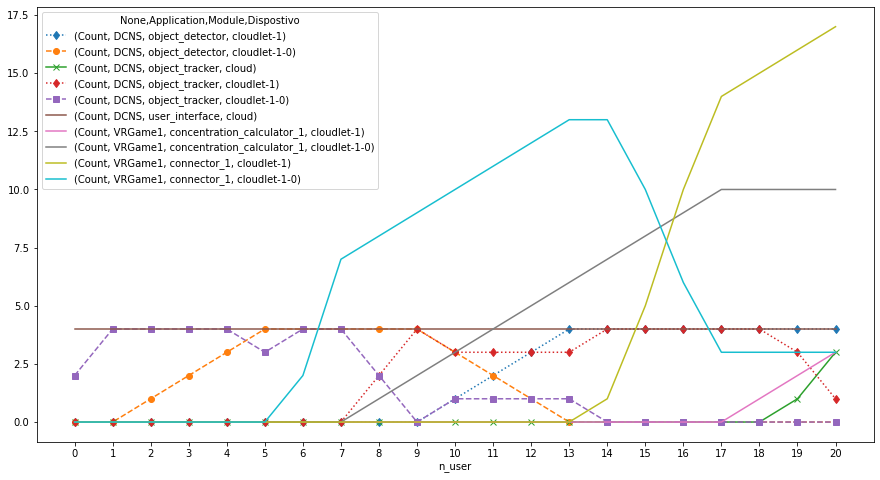

In [35]:
#mobile_users = [0,1,2,3,4,5,6,7,8,9,10,11]
temp = df_processos_dispositivo2[
    ((df_processos_dispositivo2['Application']=='VRGame1')
    | (df_processos_dispositivo2['Application']=='DCNS'))
#     & (df_processos_dispositivo2['n_user'] < 12)
    & (df_processos_dispositivo2['algoritimo'] == 'Novo V3')
].pivot_table(
     values=['Count'],
     index=['n_user'],
     columns=['Application','Module','Dispostivo'],                                     
     aggfunc=np.sum
 ).fillna(0)

#temp.columns = [col[1] for col in df_processos_dispositivo3.columns.values]
fig = temp.plot(figsize=(15, 8),
          style=["d:","o--","x-","d:",'s--']
          )
fig.set_xticks(mobile_users)
fig
# df_processos_dispositivo2[
#     (df_processos_dispositivo2['Application']=='VRGame1')
# ]

#lt.savefig(pdfs+'devices.pdf')

In [36]:
df_processos_dispositivo2[
    (df_processos_dispositivo2['Application']=='VRGame1')
    & (df_processos_dispositivo2['n_user'] < 12)
    & (df_processos_dispositivo2['algoritimo'] == 'Novo V3')
    & (df_processos_dispositivo2['n_user'] == 7)
]

,Module,Count,Time,Level,Application,Dispostivo,algoritimo,n_user,label,label2
1,connector_1,7,2999.0,3,VRGame1,cloudlet-1-0,Novo V3,7,VRGame1/cloudlet-1-0,cloudlet-1-0/connector_1


In [37]:
# fig, axs = plt.subplots(len(expertiments_anlysis)//2+len(expertiments_anlysis)%2, 2, figsize=(15,15))
# devicePattensMap = {
#     'cloud': 'oo',
#     'cloudlet-1': ''
# }

# moduleColorsMap = {
#     'concentration_calculator_1': '#ffcdb2',
#     'connector_1': '#b5838d',
#     'object_detector': '#03045e',    
#     'object_tracker': '#00b4d8',
#     'user_interface': '#caf0f8'
# }
# width = 0.35

# def getPattern(column):
#     return [devicePattensMap[p] for p in devicePattensMap.keys() if p in column][0]

# def getColor(column):
#     return [moduleColorsMap[p] for p in moduleColorsMap.keys() if p in column][0]

# lines, labels = None, None

# for key, algo in enumerate(expertiments_anlysis):
# # for key, algo in enumerate([10]):    
#     df_temp = df_processos_dispositivo2[
#         (df_processos_dispositivo2['Application']=="VRGame1")
#         &(df_processos_dispositivo2['algoritimo']==algoritimos[algo])
#     ].pivot_table(
#         values=['Count'],
#         index=['n_user'],
#         columns=['Application','Dispostivo', 'Module'],                                     
#         aggfunc="sum"
#     ).fillna(0)


#     before = False
#     for k,c in enumerate(df_temp.columns):
#         axs[key//2, key%2].bar(
#             x = df_temp.index + (width/2),
#             height= df_temp[df_temp.columns[k]],
#             hatch=getPattern(c),
#             color=getColor(c),
#             bottom=before,
#             label=c[1]+'/'+c[3],
#             width=width
#         )

#         before = df_temp[df_temp.columns[k]]
#         axs[key//2, key%2].legend()   
#         axs[key//2, key%2].title.set_text(f'{algoritimos[algo]}({algo})')   
        
#         lines, labels = axs[key//2, key%2].get_legend_handles_labels()
# #     #----
#     df_temp = df_processos_dispositivo2[
#         (df_processos_dispositivo2['Application']=="DCNS")
#         &(df_processos_dispositivo2['algoritimo']==algoritimos[algo])
#     ].pivot_table(
#         values=['Count'],
#         index=['n_user'],
#         columns=['Application','Dispostivo', 'Module'],                                     
#         aggfunc="sum"
#     ).fillna(0)


#     before = False
#     for k,c in enumerate(df_temp.columns):
#         axs[key//2, key%2].bar(
#             x = df_temp.index - (width/2),
#             height= df_temp[df_temp.columns[k]],
#             hatch=getPattern(c),
#             color=getColor(c),
#             bottom=before,
#             label=c[1]+'/'+c[3],
#             width=width
#         )
#         before = df_temp[df_temp.columns[k]]
#     axs[key//2, key%2].legend()   
#     axs[key//2, key%2].title.set_text(f'{algoritimos[algo]}({algo})')  
    
#     axs[key//2, key%2].set_ylim(0,35)
#     axs[key//2, key%2].set_xticks(np.arange(17))
# #     #---
    
#     df_delay_pivot = df_delay2[
#         ((df_delay2['Application']=="VRGame1")|(df_delay2['Application']=="DCNS") )
#         & (df_delay2['algoritimo']==algoritimos[algo])].pivot_table(
#         values=['Delay'],
#         columns=['Application'],
#         index=['n_user'],
#         aggfunc=np.sum,
#     )
    
    
#     ax2 = axs[key//2, key%2].twinx()
#     df_delay_pivot.plot(ax=ax2,legend=True)
#     ax2.legend(loc='upper right')
#     ax2.set_ylim(0,1600)

# #fig.legend(lines, labels, loc = 'upper center')    


In [19]:
df_tuples = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    for mobile_user in mobile_users:
        df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_user}_tupleExecution.csv')
        df['algoritimo'] = algoritimos[experiment_number]
        df['n_user'] = mobile_user
        if df_tuples.empty:
            df_tuples = df
        else:
            df_tuples = pd.concat([df_tuples,df])

In [20]:
df_tuples = df_tuples[
    (df_tuples['EndTime']>0)  
    & (df_tuples['CpuTime']>0)  
    & (df_tuples['Module']!='client_1')  
    & (df_tuples['AppId'].isin(['VRGame1','DCNS','LSWM']))
    & (~df_tuples['TupleType'].isin(['CAMERA','EGG_1','PRESSURE']))
]        

df_tuples

,Module,CloudletLenght,EndTime,DeviceName,TupleType,CloudletId,UserId,AppId,CpuTime,AssociatedModuleInstance,StartTime,algoritimo,n_user
10,object_detector,2103,21.135232,cloudlet-1,MOTION_VIDEO_STREAM,16,2,DCNS,0.845863,2,20.289369,DP-I,0
11,object_detector,1950,23.660299,cloudlet-1,MOTION_VIDEO_STREAM,17,2,DCNS,3.036496,3,20.623803,DP-I,0
14,object_detector,2019,23.660299,cloudlet-1,MOTION_VIDEO_STREAM,20,2,DCNS,2.525067,4,21.135232,DP-I,0
15,object_detector,2146,23.660299,cloudlet-1,MOTION_VIDEO_STREAM,21,2,DCNS,1.709500,5,21.950799,DP-I,0
21,object_detector,2013,25.271491,cloudlet-1,MOTION_VIDEO_STREAM,27,2,DCNS,1.106500,2,24.164991,DP-I,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16610,object_tracker,989,2995.844637,cloud,OBJECT_LOCATION,20801,2,DCNS,0.122076,3,2995.722561,Novo V3,20
16611,object_tracker,908,2996.807374,cloud,OBJECT_LOCATION,20806,2,DCNS,0.120268,4,2996.687106,Novo V3,20
16612,object_tracker,928,2997.461582,cloud,OBJECT_LOCATION,20808,2,DCNS,0.053813,5,2997.407769,Novo V3,20
16613,object_tracker,925,2997.749131,cloud,OBJECT_LOCATION,20810,2,DCNS,0.120647,2,2997.628483,Novo V3,20


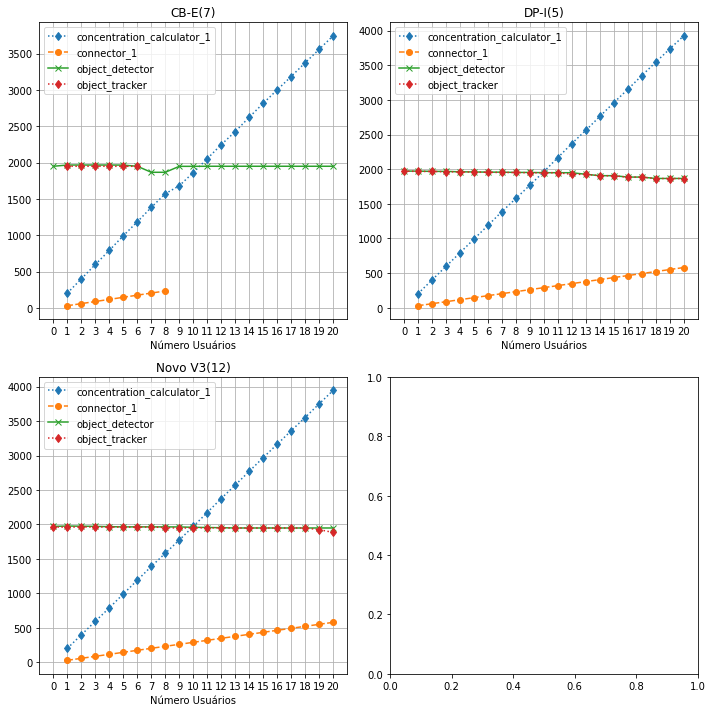

In [211]:
fig, axs = plt.subplots(len(expertiments_anlysis)//2+len(expertiments_anlysis)%2, 2, figsize=(10,10))


for key, algo in enumerate(expertiments_anlysis):
    df_temp = df_tuples[df_tuples['algoritimo']==algoritimos[algo]].pivot_table(
                                     values=['CloudletId'],
                                     index=['n_user'],
                                     columns=['Module'],                                     
                                     aggfunc='count'
                                     )
    df_temp.columns = [col[1] for col in df_temp.columns.values]
    df_temp.plot(ax=axs[key//2, key%2],
                                  style=["d:","o--","x-","d:",'s--'],
                                  title=f'{algoritimos[algo]}({algo})')
    axs[key//2, key%2].set_xlabel("Número Usuários", fontsize=10)
    axs[key//2, key%2].set_xticks(mobile_users)
    axs[key//2, key%2].grid()    
plt.tight_layout()    
 

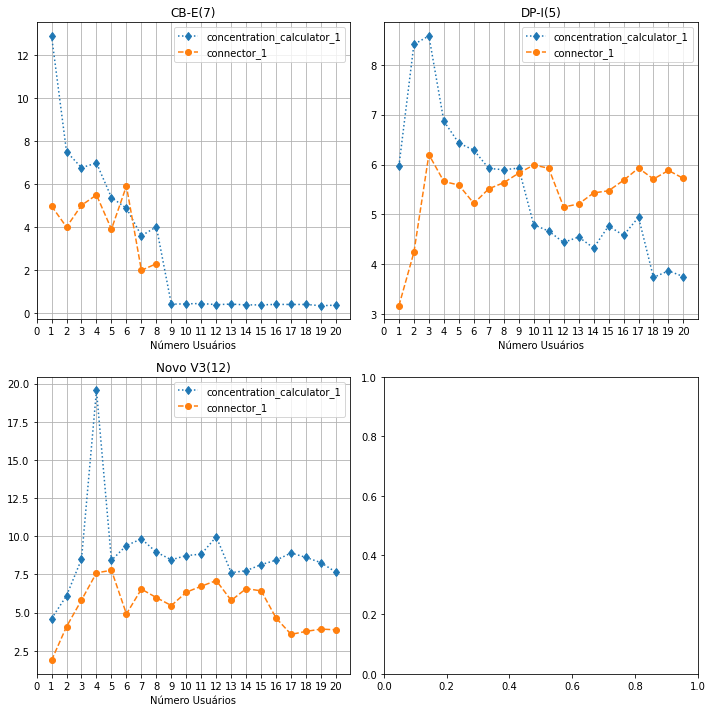

In [212]:
fig, axs = plt.subplots(len(expertiments_anlysis)//2+len(expertiments_anlysis)%2, 2, figsize=(10,10))


for key, algo in enumerate(expertiments_anlysis):
    df_temp = df_tuples[ (df_tuples['algoritimo']==algoritimos[algo]) & (df_tuples['AppId']=='VRGame1') ].pivot_table(
                                     values=['CpuTime'],
                                     index=['n_user'],
                                     columns=['Module'],                                     
                                     aggfunc='mean'
                                     )
    df_temp.columns = [col[1] for col in df_temp.columns.values]
    df_temp.plot(ax=axs[key//2, key%2],
                                  style=["d:","o--","x-","d:",'s--'],
                                  title=f'{algoritimos[algo]}({algo})')
    axs[key//2, key%2].set_xlabel("Número Usuários", fontsize=10)
    axs[key//2, key%2].set_xticks(mobile_users)
    axs[key//2, key%2].grid()    
plt.tight_layout()    

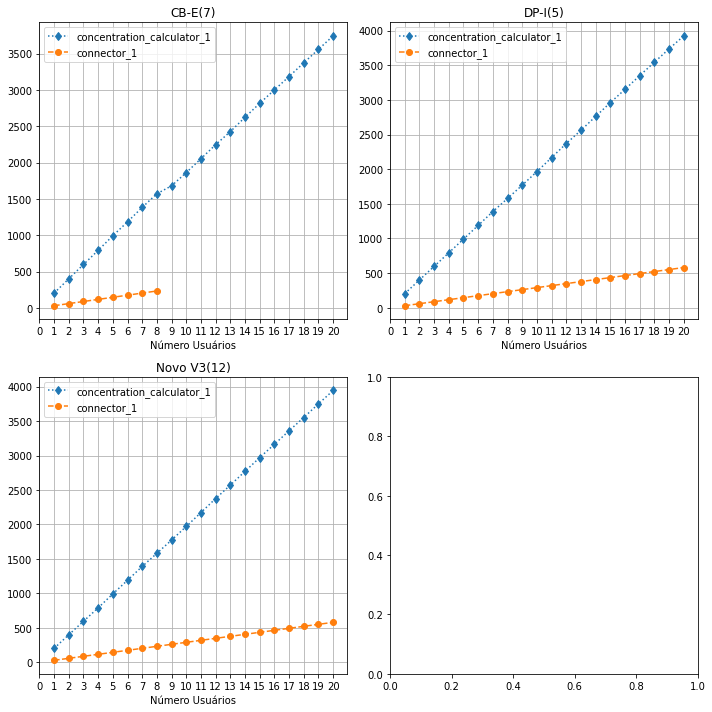

In [213]:
fig, axs = plt.subplots(len(expertiments_anlysis)//2+len(expertiments_anlysis)%2, 2, figsize=(10,10))


for key, algo in enumerate(expertiments_anlysis):
    df_temp = df_tuples[ (df_tuples['algoritimo']==algoritimos[algo]) & (df_tuples['AppId']=='VRGame1') ].pivot_table(
                                     values=['CpuTime'],
                                     index=['n_user'],
                                     columns=['Module'],                                     
                                     aggfunc='count'
                                     )
    df_temp.columns = [col[1] for col in df_temp.columns.values]
    df_temp.plot(ax=axs[key//2, key%2],
                                  style=["d:","o--","x-","d:",'s--'],
                                  title=f'{algoritimos[algo]}({algo})')
    axs[key//2, key%2].set_xlabel("Número Usuários", fontsize=10)
    axs[key//2, key%2].set_xticks(mobile_users)
    axs[key//2, key%2].grid()    
plt.tight_layout()    

In [214]:
df_tuples[(df_tuples['algoritimo']=='CB-E') 
          & (df_tuples['AppId']=='VRGame1') 
          & (df_tuples['TupleType']=='_SENSOR_1')]

sensors = {
    'VRGame1':'EEG_1',
    'DCNS':'CAMERA'
}

valores = pd.DataFrame(columns=['AppId','delta'])

for app in ['VRGame1','DCNS']:
    instances = df[(df['AppId']==app) & (df['TupleType']==sensors[app])]['AssociatedModuleInstance'].unique()    
    for instance in instances:
        df_temp = df[(df['AppId']==app) 
            & (df['TupleType']==sensors[app]) 
            & (df['AssociatedModuleInstance']==instance)]
        df_temp['LastArrive'] = df_temp['StartTime'].shift(1)
        df_temp['delta'] = df_temp['StartTime'] - df_temp['LastArrive']
        

        valores = pd.concat([valores,df_temp[['AppId','delta']]])

<ipython-input-214-8dd8f84fe83a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['LastArrive'] = df_temp['StartTime'].shift(1)
<ipython-input-214-8dd8f84fe83a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['delta'] = df_temp['StartTime'] - df_temp['LastArrive']
<ipython-input-214-8dd8f84fe83a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http